In [1]:
import numpy as np
import scipy as sp
from scipy import linalg as la
from matplotlib import pyplot as plt
import cmath

In [2]:
#problem 1

def truncated_svd(A, k = None):
    A = np.array(A)
    eigvals, eigvecs = la.eig(np.transpose(A) @ A)
    order = np.argsort(eigvals)[::-1]
    order = np.where(abs(eigvals) > 1e-10)
    rank = len(order)
    eigvals = eigvals[order]
    eigvecs = eigvecs[order]
    if k < rank:
        eigvals = eigvals[:(k-rank),]
        eigvecs = eigvecs[:(k-rank),]
    sigmas = np.lib.scimath.sqrt(eigvals)
    V = np.transpose(eigvecs)
    Sigma = np.diag(sigmas)
    U = np.divide((A @ V), sigmas)
    return U, Sigma, V
    

In [3]:
A = np.random.random((3,2))
U, Sigma, V = truncated_svd(A, k = 3)
np.allclose(A , U@Sigma@np.transpose(V))

True

C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


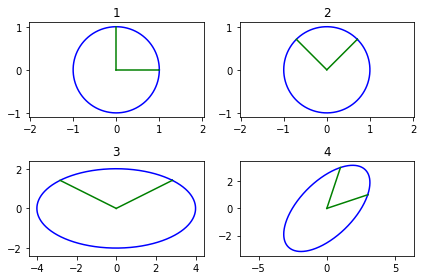

In [4]:
#problem 2
theta = np.linspace(0, 2*np.pi, 1000)
x = np.cos(theta)
y = np.sin(theta)
b1 = np.array([[1,0], [0,1]])
S1 = np.transpose(np.column_stack((x,y)))
A = [[3, 1], [1, 3]]
U, Sigma, V = truncated_svd(A, k = 2)
S2 = np.transpose(V)@S1
b2 = np.transpose(V)@b1
S3 = Sigma@S2
b3 = Sigma@b2
S4 = U@S3
b4 = U@b3

prob2_fig = plt.figure()
for i in range(4):
    index = i + 1
    S = globals()["S"+str(index)]
    b = globals()["b"+str(index)]
    e1= b[:, 0]
    e1 = np.column_stack((np.zeros_like(e1), e1))
    e2= b[:, 1]
    e2 = np.column_stack((np.zeros_like(e2), e2))
    plt.subplot(2, 2, index)
    plt.plot(S[0,:], S[1, :], "b-")
    plt.plot(e1[0,:], e1[1,:], "g")
    plt.plot(e2[0,:], e2[1,:], "g")
    plt.axis("equal")
    plt.title(str(index))

plt.tight_layout()
plt.show()
    

In [5]:
#problem 3
def svd_approx(A, k):
    A = np.array(A)
    U,s,Vh = la.svd(A, full_matrices=False)
    if len(s) == k:
        return A
    else:
        S = np.diag(s[:k])
        Ahat = U[:,:k]@ S @ (Vh[:k,:])
        return Ahat

In [6]:
#problem 4
def lowest_rank_approx(A , e):
    A = np.array(A)
    U,s,Vh = la.svd(A, full_matrices=False)
    i,  = np.where(s < e)
    rank = int(i)
    return svd_approx(A, rank)


In [7]:
#problem 5
# Image compression, woha!
def compress_img(file, k):
    X = plt.imread(file)#[:,:,0].astype(float)
    X_r  = svd_approx(X[:, :, 0], k)
    X_r = X_r*(1/255)
    X_r[X_r < 0] = 0
    X_r[X_r > 1] = 1
    X_g  = svd_approx(X[:, :, 1], k)
    X_g = X_g*(1/255)
    X_g[X_g < 0] = 0
    X_g[X_g > 1] = 1
    X_b  = svd_approx(X[:, :, 2], k)
    X_b = X_b*(1/255)
    X_b[X_b < 0] = 0
    X_b[X_b > 1] = 1

    X_new = np.dstack((X_r, X_g, X_b))

    plt.imshow(X_new)
    plt.title("compressed image, rank ="+str(k))
    plt.show()

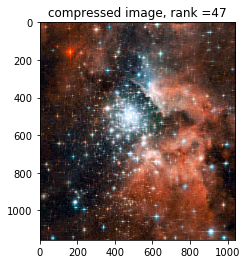

In [8]:
compress_img("hubble.jpg", 47)


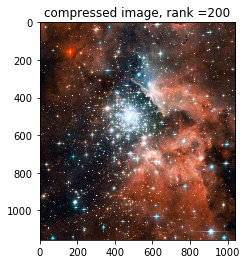

In [9]:
compress_img("hubble.jpg", 200)


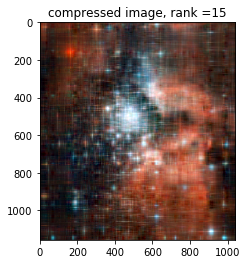

In [10]:
compress_img("hubble.jpg", 15)